In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/sample_submission.csv
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/train.csv
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test.csv
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/1269.jpg
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/2008.jpg
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/208.jpg
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/1789.jpg
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/1411.jpg
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/1501.jpg
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/2021.jpg
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/1385.jpg
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/2278.jpg
/kaggle/input/emergency-vehicl

## I. Importing all the necessary libraries

In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt

import tensorflow as tf

## II. Reading the datasets

In [3]:
train_dir = "../input/emergency-vehicles-identification/Emergency_Vehicles/train"
test_dir = "../input/emergency-vehicles-identification/Emergency_Vehicles/test"
train_df = pd.read_csv('../input/emergency-vehicles-identification/Emergency_Vehicles/train.csv')
train_df.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


## III. Displaying the images

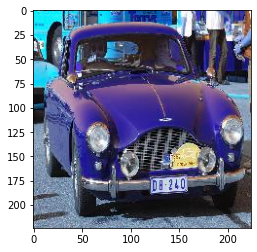

In [4]:
im = cv2.imread("../input/emergency-vehicles-identification/Emergency_Vehicles/train/1013.jpg")
plt.imshow(im)

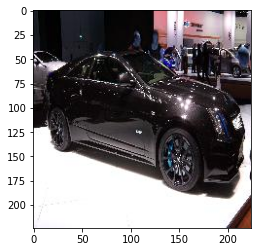

In [5]:
im2 = cv2.imread("../input/emergency-vehicles-identification/Emergency_Vehicles/train/2151.jpg")
plt.imshow(im2)

#### Setting all datatypes to string

In [6]:
train_df.emergency_or_not=train_df.emergency_or_not.astype(str)

## IV. Configuring the Image Data Generator

### In this part of the code, we do the following :-

- #### Configure the Image Data Generator and specify the transformations
- #### Have a train-test split ratio of 70-30.
- #### Get the dimensions of the training and validation generators.
- #### Finding the total number of samples for both training and validation generators


#### *Configuring image data generator and specifying the transformations*

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip = True)
batch_size = 32

#### *Setting up the generator for training and validation data*

In [8]:
traingen = datagen.flow_from_dataframe(dataframe = train_df[:1150],directory = train_dir,x_col ='image_names',
                                            y_col = 'emergency_or_not',class_mode = 'binary',batch_size = batch_size,
                                            target_size = (32,32))


valgen = datagen.flow_from_dataframe(dataframe = train_df[1151:],directory = train_dir,x_col = 'image_names',
                                                y_col ='emergency_or_not',class_mode ='binary',batch_size = 50,
                                                target_size = (32,32))

Found 1150 validated image filenames belonging to 2 classes.
Found 495 validated image filenames belonging to 2 classes.


#### *Finding the dimensions of training and validation generators*

In [9]:
trainsample = next(traingen)
print("Dimensions of training sample",trainsample[0].shape)
valsample = next(valgen)
print("Dimensions of validation sample",valsample[0].shape)

Dimensions of training sample (32, 32, 32, 3)
Dimensions of validation sample (50, 32, 32, 3)


#### *Finding the number of samples in each generator*

In [10]:
num_train_samples = traingen.samples
num_val_samples = valgen.samples

print("Number of training samples", num_train_samples)
print("Number of validation samples", num_val_samples)

Number of training samples 1150
Number of validation samples 495


## V.   Making the CNN


  ### (1) With Data Augmentation

#### *(a) Building the network*

In [11]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

op = tf.keras.optimizers.Adam(learning_rate = 0.001)
loss = tf.keras.losses.BinaryCrossentropy(from_logits = False)
model.compile(optimizer = op, loss = loss, metrics = ['accuracy'])

history = model.fit(traingen, steps_per_epoch = num_train_samples/50, 
                    epochs = 50, validation_data = valgen,
                    validation_steps = num_val_samples/50)

2022-02-24 20:42:19.803913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-24 20:42:19.937545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-24 20:42:19.938321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-24 20:42:19.939451: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/50


2022-02-24 20:42:24.117064: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


23/23 [==============================] - 13s 293ms/step - loss: 0.7184 - accuracy: 0.5163 - val_loss: 0.6440 - val_accuracy: 0.6384
Epoch 2/50
23/23 [==============================] - 3s 128ms/step - loss: 0.6324 - accuracy: 0.6467 - val_loss: 0.6181 - val_accuracy: 0.6788
Epoch 3/50
23/23 [==============================] - 2s 103ms/step - loss: 0.5824 - accuracy: 0.6935 - val_loss: 0.5335 - val_accuracy: 0.7273
Epoch 4/50
23/23 [==============================] - 2s 87ms/step - loss: 0.5211 - accuracy: 0.7398 - val_loss: 0.5149 - val_accuracy: 0.7495
Epoch 5/50
23/23 [==============================] - 2s 82ms/step - loss: 0.4888 - accuracy: 0.7629 - val_loss: 0.4834 - val_accuracy: 0.7677
Epoch 6/50
23/23 [==============================] - 2s 81ms/step - loss: 0.4535 - accuracy: 0.7888 - val_loss: 0.5005 - val_accuracy: 0.7596
Epoch 7/50
23/23 [==============================] - 2s 83ms/step - loss: 0.4633 - accuracy: 0.7853 - val_loss: 0.4675 - val_accuracy: 0.7717
Epoch 8/50
23/23 [==

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### *(b) Graphing the losses and accuracy*

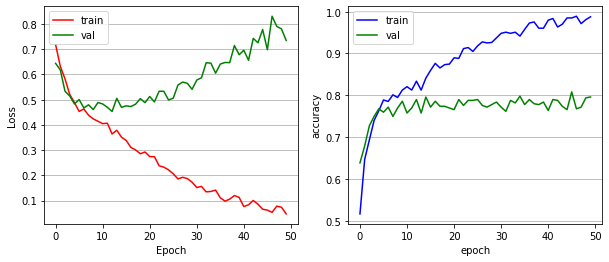

In [13]:
figure = plt.figure(figsize = (10,4))
ax = plt.subplot(121)

ax.plot(history.history['loss'], 'r', label = 'train')
ax.plot(history.history['val_loss'],'g',label = 'val')

plt.legend()
plt.grid(axis = 'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("Emergency dataset with data augmentation")

### (2) Early Stopping

In [14]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('model_es.h5', monitor = 'val_loss',verbose=0, save_best_only=True)

#### *(a) Building the network*

In [15]:
model2 = Sequential()
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(10))
model2.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

callbacks = [early_stopping_callback, model_checkpoint_callback]

model2.compile(optimizer = op,
              loss = loss,
              metrics=['accuracy'])

history2 = model2.fit(traingen, steps_per_epoch = num_train_samples/50, 
                    epochs = 50, validation_data = valgen,
                    validation_steps = num_val_samples/50, callbacks = callbacks)

model2.summary()

Epoch 1/50
23/23 [==============================] - 3s 100ms/step - loss: 0.6669 - accuracy: 0.6087 - val_loss: 0.6677 - val_accuracy: 0.6202
Epoch 2/50
23/23 [==============================] - 2s 81ms/step - loss: 0.6284 - accuracy: 0.6458 - val_loss: 0.6076 - val_accuracy: 0.6525
Epoch 3/50
23/23 [==============================] - 2s 82ms/step - loss: 0.5756 - accuracy: 0.7071 - val_loss: 0.5663 - val_accuracy: 0.7434
Epoch 4/50
23/23 [==============================] - 2s 80ms/step - loss: 0.5458 - accuracy: 0.7520 - val_loss: 0.5267 - val_accuracy: 0.7414
Epoch 5/50
23/23 [==============================] - 2s 81ms/step - loss: 0.4969 - accuracy: 0.7704 - val_loss: 0.4967 - val_accuracy: 0.7475
Epoch 6/50
23/23 [==============================] - 3s 113ms/step - loss: 0.4761 - accuracy: 0.7684 - val_loss: 0.4736 - val_accuracy: 0.7556
Epoch 7/50
23/23 [==============================] - 2s 81ms/step - loss: 0.4428 - accuracy: 0.7745 - val_loss: 0.4813 - val_accuracy: 0.7758
Epoch 8/50


In [16]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### *(b) Graphing*

Text(0.5, 1.0, 'CNN + Data Augmentation + Early Stopping - Epoch VS Loss')

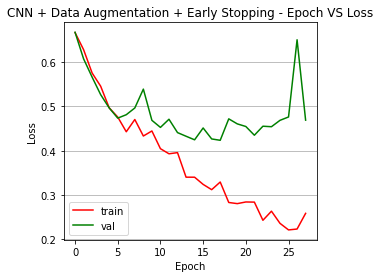

In [17]:
figure = plt.figure(figsize = (10,4))

ax = plt.subplot(121)
ax.plot(history2.history['loss'], 'r', label = 'train')
ax.plot(history2.history['val_loss'],'g',label = 'val')
plt.legend()
plt.grid(axis = 'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN + Data Augmentation + Early Stopping - Epoch VS Loss")

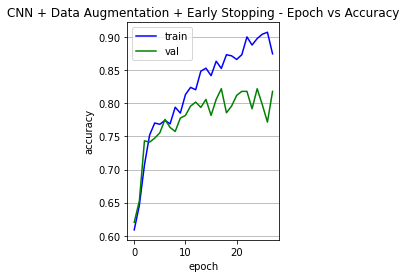

In [18]:
ax2 = plt.subplot(122)
ax2.plot(history2.history['accuracy'], 'b', label="train")
ax2.plot(history2.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')

plt.title("CNN + Data Augmentation + Early Stopping - Epoch vs Accuracy")
plt.savefig("Emergency dataset with data augmentation + early stopping")

### (3) Dropouts

#### Dropout with 0.2

#### *(a) Building the network*

In [19]:
model3 = Sequential()

model3.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same")),
model3.add(tf.keras.layers.MaxPooling2D(2,2)),
model3.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same")),
model3.add(tf.keras.layers.Flatten()),
model3.add(tf.keras.layers.Dropout(0.2)),
model3.add(tf.keras.layers.Dense(10)),
model3.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))



model3.compile(optimizer = op,
              loss = loss,
              metrics=['accuracy'])

history3 = model3.fit(traingen, steps_per_epoch = num_train_samples/50, 
                    epochs = 50, validation_data = valgen,
                    validation_steps = num_val_samples/50)

Epoch 1/50
23/23 [==============================] - 3s 110ms/step - loss: 0.7878 - accuracy: 0.5341 - val_loss: 0.6827 - val_accuracy: 0.5434
Epoch 2/50
23/23 [==============================] - 2s 91ms/step - loss: 0.6594 - accuracy: 0.6294 - val_loss: 0.5439 - val_accuracy: 0.7131
Epoch 3/50
23/23 [==============================] - 2s 81ms/step - loss: 0.5529 - accuracy: 0.7351 - val_loss: 0.5337 - val_accuracy: 0.7232
Epoch 4/50
23/23 [==============================] - 2s 81ms/step - loss: 0.5380 - accuracy: 0.7289 - val_loss: 0.5140 - val_accuracy: 0.7475
Epoch 5/50
23/23 [==============================] - 2s 83ms/step - loss: 0.5183 - accuracy: 0.7466 - val_loss: 0.4875 - val_accuracy: 0.7717
Epoch 6/50
23/23 [==============================] - 2s 84ms/step - loss: 0.5357 - accuracy: 0.7255 - val_loss: 0.4913 - val_accuracy: 0.7657
Epoch 7/50
23/23 [==============================] - 2s 97ms/step - loss: 0.4979 - accuracy: 0.7561 - val_loss: 0.4859 - val_accuracy: 0.7596
Epoch 8/50
2

#### *(b) Graphing*

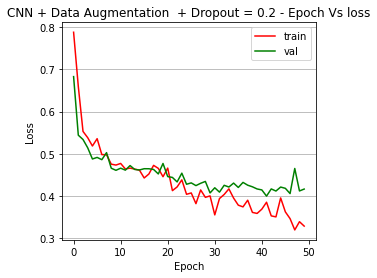

In [20]:
figure = plt.figure(figsize = (10,4))
ax = plt.subplot(121)

ax.plot(history3.history['loss'], 'r', label = 'train')
ax.plot(history3.history['val_loss'],'g',label = 'val')

plt.legend()
plt.grid(axis = 'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")


plt.title("CNN + Data Augmentation  + Dropout = 0.2 - Epoch Vs loss")
plt.savefig("Emergency dataset with data augmentation + early stopping")

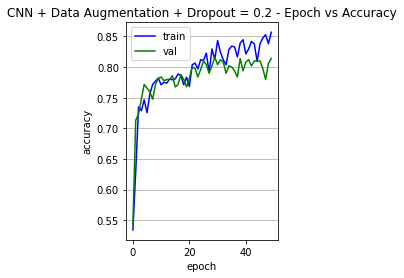

In [21]:
ax2 = plt.subplot(122)
ax2.plot(history3.history['accuracy'], 'b', label="train")
ax2.plot(history3.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')

plt.title("CNN + Data Augmentation + Dropout = 0.2 - Epoch vs Accuracy")
plt.savefig("Emergency dataset with data augmentation + early stopping")

#### Dropout = 0.4

#### *(a) Building the network*

In [22]:
model4 = Sequential()
model4.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model4.add(tf.keras.layers.MaxPooling2D(2,2))
model4.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dropout(0.4))
model4.add(tf.keras.layers.Dense(10))
model4.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))


model4.compile(optimizer = op,
              loss = loss,
              metrics=['accuracy'])

history4 = model4.fit(traingen, steps_per_epoch = num_train_samples/50, 
                    epochs = 50, validation_data = valgen,
                    validation_steps = num_val_samples/50)

Epoch 1/50
23/23 [==============================] - 3s 103ms/step - loss: 0.7455 - accuracy: 0.5395 - val_loss: 0.6434 - val_accuracy: 0.6707
Epoch 2/50
23/23 [==============================] - 2s 83ms/step - loss: 0.6476 - accuracy: 0.6417 - val_loss: 0.6046 - val_accuracy: 0.6909
Epoch 3/50
23/23 [==============================] - 2s 100ms/step - loss: 0.5941 - accuracy: 0.7147 - val_loss: 0.6165 - val_accuracy: 0.6808
Epoch 4/50
23/23 [==============================] - 2s 85ms/step - loss: 0.5666 - accuracy: 0.7269 - val_loss: 0.5873 - val_accuracy: 0.6889
Epoch 5/50
23/23 [==============================] - 2s 97ms/step - loss: 0.5278 - accuracy: 0.7520 - val_loss: 0.4922 - val_accuracy: 0.7798
Epoch 6/50
23/23 [==============================] - 2s 84ms/step - loss: 0.5087 - accuracy: 0.7636 - val_loss: 0.4984 - val_accuracy: 0.7697
Epoch 7/50
23/23 [==============================] - 2s 84ms/step - loss: 0.5177 - accuracy: 0.7486 - val_loss: 0.5105 - val_accuracy: 0.7657
Epoch 8/50


#### *(b) Graphing*

Text(0.5, 1.0, 'CNN + Data Augmentation + Dropout = 0.4 - Epoch VS Loss')

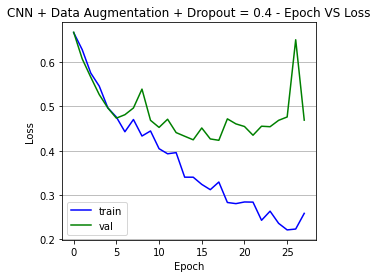

In [23]:
figure = plt.figure(figsize = (10,4))

ax = plt.subplot(121)
ax.plot(history2.history['loss'], 'b', label = 'train')
ax.plot(history2.history['val_loss'],'g',label = 'val')
plt.legend()
plt.grid(axis = 'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN + Data Augmentation + Dropout = 0.4 - Epoch VS Loss")

Text(0.5, 1.0, 'CNN + Data Augmentation + Dropout = 0.4 - Epoch VS Accuracy')

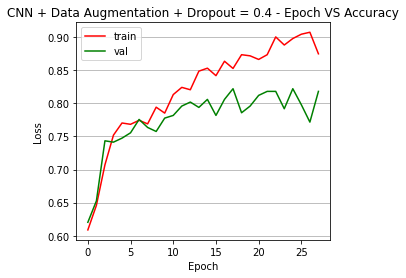

In [24]:
figure = plt.figure(figsize = (10,4))

ax = plt.subplot(121)
ax.plot(history2.history['accuracy'], 'r', label = 'train')
ax.plot(history2.history['val_accuracy'],'g',label = 'val')
plt.legend()
plt.grid(axis = 'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN + Data Augmentation + Dropout = 0.4 - Epoch VS Accuracy")

## (4) Regularization

#### Lasso (L1) regularization

#### *(a) Building the network*

In [25]:
model5 = Sequential()
model5.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model5.add(tf.keras.layers.MaxPooling2D(2,2))
model5.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(10))
model5.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))


model5.compile(optimizer = op,
              loss = loss,
              metrics=['accuracy'])

history5 = model5.fit(traingen, steps_per_epoch = num_train_samples/50, 
                    epochs = 50, validation_data = valgen,
                    validation_steps = num_val_samples/50)

Epoch 1/50
23/23 [==============================] - 3s 94ms/step - loss: 1.0616 - accuracy: 0.5639 - val_loss: 0.9300 - val_accuracy: 0.6101
Epoch 2/50
23/23 [==============================] - 2s 91ms/step - loss: 0.8717 - accuracy: 0.6512 - val_loss: 0.7674 - val_accuracy: 0.7212
Epoch 3/50
23/23 [==============================] - 3s 112ms/step - loss: 0.7757 - accuracy: 0.6576 - val_loss: 0.7011 - val_accuracy: 0.7354
Epoch 4/50
23/23 [==============================] - 2s 84ms/step - loss: 0.7094 - accuracy: 0.7228 - val_loss: 0.6535 - val_accuracy: 0.7556
Epoch 5/50
23/23 [==============================] - 2s 84ms/step - loss: 0.6773 - accuracy: 0.7255 - val_loss: 0.6223 - val_accuracy: 0.7596
Epoch 6/50
23/23 [==============================] - 2s 81ms/step - loss: 0.6393 - accuracy: 0.7452 - val_loss: 0.5865 - val_accuracy: 0.7515
Epoch 7/50
23/23 [==============================] - 2s 84ms/step - loss: 0.6145 - accuracy: 0.7500 - val_loss: 0.5637 - val_accuracy: 0.7717
Epoch 8/50
2

#### *(b) Graphing*

Text(0.5, 1.0, 'CNN + Data Augmentation + L1 regularization - Epoch VS Loss')

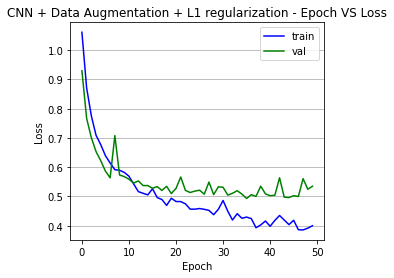

In [26]:
figure = plt.figure(figsize = (10,4))

ax = plt.subplot(121)
ax.plot(history5.history['loss'], 'b', label = 'train')
ax.plot(history5.history['val_loss'],'g',label = 'val')
plt.legend()
plt.grid(axis = 'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN + Data Augmentation + L1 regularization - Epoch VS Loss")

Text(0.5, 1.0, 'CNN + Data Augmentation + L1 regularization - Epoch VS Accuracy')

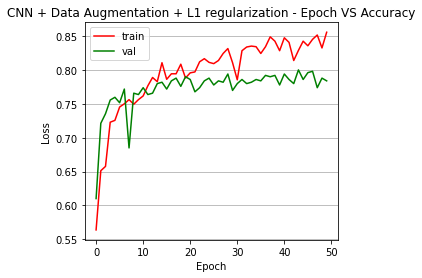

In [27]:
figure = plt.figure(figsize = (10,4))

ax = plt.subplot(121)
ax.plot(history5.history['accuracy'], 'r', label = 'train')
ax.plot(history5.history['val_accuracy'],'g',label = 'val')
plt.legend()
plt.grid(axis = 'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN + Data Augmentation + L1 regularization - Epoch VS Accuracy")

#### L2 (Ridge Regression) regularization

#### *(a) Building the network*

In [28]:
model6 = Sequential()
model6.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model6.add(tf.keras.layers.MaxPooling2D(2,2))
model6.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dense(10))
model6.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))


model6.compile(optimizer = op,
              loss = loss,
              metrics=['accuracy'])

history6 = model6.fit(traingen, steps_per_epoch = num_train_samples/50, 
                    epochs = 50, validation_data = valgen,
                    validation_steps = num_val_samples/50)

Epoch 1/50
23/23 [==============================] - 2s 89ms/step - loss: 0.7285 - accuracy: 0.6144 - val_loss: 0.6413 - val_accuracy: 0.6727
Epoch 2/50
23/23 [==============================] - 2s 98ms/step - loss: 0.6265 - accuracy: 0.6929 - val_loss: 0.5683 - val_accuracy: 0.7434
Epoch 3/50
23/23 [==============================] - 2s 84ms/step - loss: 0.5917 - accuracy: 0.7262 - val_loss: 0.5494 - val_accuracy: 0.7333
Epoch 4/50
23/23 [==============================] - 2s 92ms/step - loss: 0.5602 - accuracy: 0.7480 - val_loss: 0.5299 - val_accuracy: 0.7576
Epoch 5/50
23/23 [==============================] - 2s 81ms/step - loss: 0.5111 - accuracy: 0.7711 - val_loss: 0.5208 - val_accuracy: 0.7556
Epoch 6/50
23/23 [==============================] - 2s 83ms/step - loss: 0.5235 - accuracy: 0.7534 - val_loss: 0.5107 - val_accuracy: 0.7616
Epoch 7/50
23/23 [==============================] - 2s 82ms/step - loss: 0.5117 - accuracy: 0.7738 - val_loss: 0.4958 - val_accuracy: 0.7677
Epoch 8/50
23

#### *(b) Graphing*

Text(0.5, 1.0, 'CNN + Data Augmentation + L2 regularization - Epoch VS Loss')

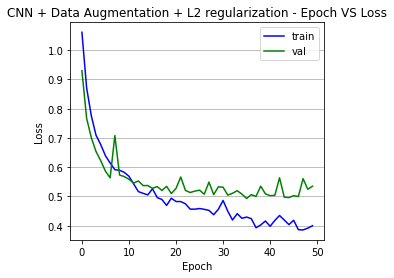

In [29]:
figure = plt.figure(figsize = (10,4))

ax = plt.subplot(121)
ax.plot(history5.history['loss'], 'b', label = 'train')
ax.plot(history5.history['val_loss'],'g',label = 'val')
plt.legend()
plt.grid(axis = 'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN + Data Augmentation + L2 regularization - Epoch VS Loss")

Text(0.5, 1.0, 'CNN + Data Augmentation + L2 regularization - Epoch VS Accuracy')

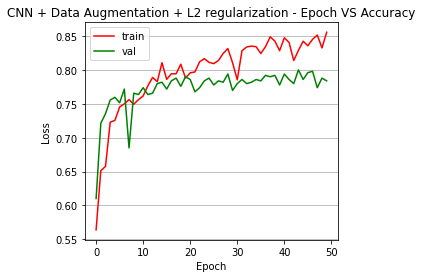

In [30]:
figure = plt.figure(figsize = (10,4))

ax = plt.subplot(121)
ax.plot(history5.history['accuracy'], 'r', label = 'train')
ax.plot(history5.history['val_accuracy'],'g',label = 'val')
plt.legend()
plt.grid(axis = 'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN + Data Augmentation + L2 regularization - Epoch VS Accuracy")